**Introduction**

In this project, we wanted to find the neighborhoods that are easiest to drive in. To do this, we looked at different things that affect how nice it is to drive. One important thing we looked at was how old the roads are and if they've been recently paved. We thought that neighborhoods with newer roads would be smoother to drive on and more enjoyable overall. So, we thought they might be the best neighborhoods for driving.

**DESCRIPTION OF METRIC**

Our metric is all about how new the road pavement is. We believe that streets with fresh pavement are better, while those with old pavement are worse. To figure this out, we used the paving schedule dataset from the city of Pittsburgh (https://data.wprdc.org/dataset/paving-schedule), which tells us when streets were scheduled to be paved. This helped us find the best streets and then locate the neighborhoods they're in. 

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("paving_schedule.csv")
data.head(10)

,_id,id,street_id,activity,task_description,status,street,start_year,stop_date_actual,route_ahead,route_back
0,1,1924601586,17060,Mechanical Patching,Paved as part of 2016 City paving program.,Completed,BALDWICK RD,2016,2016-10-31,NOBLESTOWN RD,STEEN ST
1,2,1512981617,9881,Mechanical Patching,Paved as part of 2016 City paving program.,Completed,GLENBURY ST,2016,2016-10-31,KOHEN ST,SELDON ST
2,3,640675845,6563,Mechanical Patching,Paved as part of City 2016 paving program.,Completed,S BELLEFIELD AVE,2016,2016-10-01,FILMORE ST,FIFTH AVE
3,4,538119097,17748,Mechanical Patching,Paved as part of City 2016 paving program.,Completed,S BELLEFIELD AVE,2016,2016-10-01,FORBES AVE,FILMORE ST
4,5,726876041,17060,Base Repair,NaN,Completed,BALDWICK RD,2009,2009-06-05,NOBLESTOWN RD,STEEN ST
5,6,1280601859,2137,Base Repair,NaN,Completed,N BRADDOCK AVE,2014,2014-04-15,SUSQUEHANNA ST,ANNAN WAY
6,7,1567782563,373,Base Repair,NaN,Completed,LIME ST,2009,2009-04-14,DEAD END,SAW MILL RUN BLVD
7,8,176640290,14702,Base Repair,NaN,Completed,JILLSON AVE,2013,2013-10-02,PARQUET ST,BROOKLINE BLVD
8,9,2010963472,5678,Base Repair,NaN,Completed,WESTMONT AVE,2009,2009-07-20,W AGNEW RD,COPPERFIELD AVE
9,10,2074462995,11938,Base Repair,NaN,Completed,BRABEC ST,2014,2014-07-25,BASIN ST,PROVINCE ST


In [46]:
paved_streets = data[data['status'] == 'Completed'].copy()

paved_streets.loc[:, 'stop_date_actual'] = pd.to_datetime(paved_streets['stop_date_actual'])
most_recent_year = paved_streets['start_year'].max()
most_recent_streets = paved_streets[paved_streets['start_year'] == most_recent_year]
max_stop_date = most_recent_streets['stop_date_actual'].max()
most_recent_streets = most_recent_streets[most_recent_streets['stop_date_actual'] == max_stop_date]

print("Most recent streets paved for the most recent year (", most_recent_year, "):")
print(most_recent_streets[['status', 'street', 'start_year', 'stop_date_actual']])

Most recent streets paved for the most recent year ( 2021 ):
         status          street  start_year stop_date_actual
9444  Completed  BANKSVILLE AVE        2021       2021-05-04
9445  Completed  BANKSVILLE AVE        2021       2021-05-04
9446  Completed     CARNAHAN RD        2021       2021-05-04


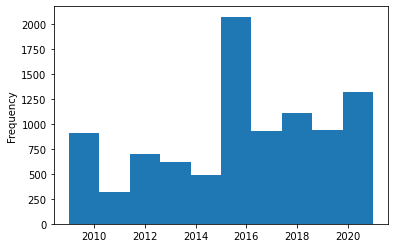

In [4]:
year = data['start_year']
year.plot.hist()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

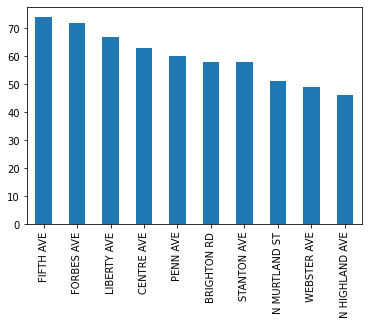

In [6]:
street = data['street'].value_counts().head(10)
street.plot.bar()
plt.show

**Thought Process Markdown.**

After reading in the dataset we removed any entry that was labled as "incomplete" because we are looking for completed pavements. Then we searched the dataset for which street(s) were most recently paved based on the column "stop_actual_date" and completion status. Then we created a graph depicting which year through out the dataset had the most street paving completed (2016). We also created a graph to determine which street(s) were paved the most often.

**Metric Conclusion.**

Based on the analysis conducted we determined a tie between Banksville Ave and Carnahan Rd due to their recent pavement dates and also due to their lack of need to be constantly repaved (lack of appearance in the second graph)